# Data Mining - Support Vector Machines ⚙️

**Authors:** [Melissa Perez](https://github.com/MelissaPerez09), [Adrian Flores](https://github.com/adrianRFlores), [Andrea Ramirez](https://github.com/Andrea-gt)

**Description:**

## Import Libraries ⬇️

In [1]:
# Standard libraries
import time
import warnings

# Data manipulation and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Machine learning models and tools
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, mean_squared_error, mean_absolute_error,
                             r2_score, classification_report, f1_score, ConfusionMatrixDisplay)

# Set matplotlib inline
%matplotlib inline

# Set random state
random_state = 42

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)

## Data Upload 📄

In [2]:
df = pd.read_csv('./data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Exploratory Analysis 🔎

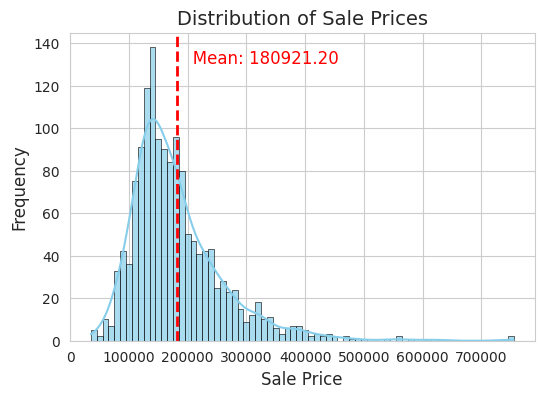

In [3]:
sns.set_style("whitegrid")

# Plotting the histogram of 'SalePrice' column from DataFrame 'df'
sns.histplot(x='SalePrice', data=df, kde=True, color='skyblue', binwidth=10000, alpha=0.7, edgecolor='black')

# Plot settings
plt.title('Distribution of Sale Prices', fontsize=14, fontweight='500')
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Calculating the mean of 'SalePrice' column
mean_value = df['SalePrice'].mean()

# Adding a vertical line representing the mean value
plt.axvline(mean_value, color='r', linestyle='--', linewidth=2)

# Adding text annotation for the mean value
plt.text(mean_value, plt.ylim()[1]*0.9, '   Mean: {:.2f}'.format(mean_value), color='r', fontsize=12)

plt.show()

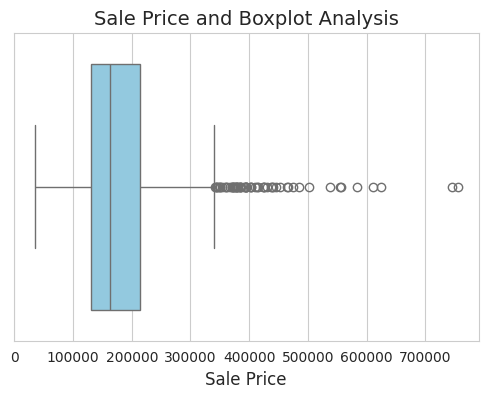

In [4]:
sns.set_style("whitegrid")

# Plotting the boxplot of 'SalePrice' column from DataFrame 'df'
sns.boxplot(x='SalePrice', data=df, color='skyblue')

# Plot settings
plt.title('Sale Price and Boxplot Analysis', fontsize=14, fontweight='500')
plt.xlabel('Sale Price', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## Data Preprocessing 🗂️

### Handling Missing Values

In [5]:
# Fill missing values in low NaN count columns
df['Electrical'] = df['Electrical'].fillna('None')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [6]:
# Impute missing LotFrontage values based on the median LotFrontage within each neighborhood.
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [7]:
# Fill missing values in FireplaceQu with 'None'.
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [8]:
# Fill missing values in garage-related variables with 'None'.
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')

In [9]:
# Fill missing values in basement-related variables with 'None'.
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')

In [10]:
# Drop columns with a high count of missing values
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [11]:
# Show columns with NaN values
nullValues = df.isnull().sum()
nullValues = nullValues[nullValues > 0]

if not nullValues.empty:
    print("Columns with NaN values:")
    print("-" * 40)
    for column, nans in nullValues.items():
        print(f"{column: <30} | {nans: >5} missing values")
    print("-" * 40)
else:
    print("No columns with NaN values found.")

No columns with NaN values found.


### Feature Engineering

In [12]:
# Define conditions for categorizing SalePrice
conditions = [
    (df['SalePrice'] < 150000),
    (df['SalePrice'] >= 150000) & (df['SalePrice'] <= 250000),
    (df['SalePrice'] > 250000)
]

# Define labels for the categories
labels = [0, 1, 2]

# Create a new column 'SalePriceCategory' based on the conditions and labels
df['SalePriceCategory'] = np.select(conditions, labels)

df.pop('SalePrice')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePriceCategory
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,1
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,1
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,2
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,0


### Encoding

In [13]:
# Columns to encode, separated by feature category
nominalFeatures = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                    'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType',
                    'SaleCondition','PavedDrive']

ordinalFeatures = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','FireplaceQu',
                    'GarageQual', 'GarageCond']

otherOrdinalFeatures = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish']

In [14]:
# Convert nominal features into dummy variables
df = pd.get_dummies(df, columns = nominalFeatures)

In [15]:
# Define ordinal categories for each ordinal feature
ordinalCategories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'] for _ in ordinalFeatures]

# Create an ordinal encoder
ordinalEncoder = OrdinalEncoder(categories=ordinalCategories)

# Fit and transform ordinal features
ordinalEncoded = ordinalEncoder.fit_transform(df[ordinalFeatures])

# Update dataframe with ordinal encoded features
for i, feature in enumerate(ordinalFeatures):
    df[feature] = ordinalEncoded[:, i]

In [16]:
# Define encoding categories for each other ordinal feature
encodingCategories = [
    ['None', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], # Functional
    ['None', 'Unf', 'RFn', 'Fin']  # GarageFinish
]

# Create an ordinal encoder
ordinalEncoder = OrdinalEncoder(categories=encodingCategories)

# Fit and transform other ordinal features
ordinalEncoded = ordinalEncoder.fit_transform(df[otherOrdinalFeatures])

# Update dataframe with ordinal encoded features
for i, feature in enumerate(otherOrdinalFeatures):
    df[feature] = ordinalEncoded[:, i]

### Splitting DataSet

In [17]:
# Create a copy of the dataframe
df_cp = df.copy()

# Separate target variable 'SalePriceCategory' from features
y = df_cp.pop('SalePriceCategory')
X = df_cp

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=random_state)

In [19]:
print(X_train.shape)
print(X_test.shape)

(1168, 225)
(292, 225)


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Columns: 225 entries, Id to PavedDrive_Y
dtypes: bool(174), float64(17), int64(34)
memory usage: 673.0 KB


In [21]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Columns: 225 entries, Id to PavedDrive_Y
dtypes: bool(174), float64(17), int64(34)
memory usage: 168.2 KB


### Feature Standarization

In [22]:
# Scale the features in the training set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# Scale the features in the test set
X_test = sc.transform(X_test)

Los modelos de Máquinas de Vectores de Soporte (SVM) tienden a ser sensibles a datos ruidosos y valores atípicos, ya que estos pueden afectar la posición y la orientación del límite de decisión. En el contexto de este problema, se ha observado a través del análisis exploratorio que los datos, especialmente la variable objetivo 'SalePrice' que a su vez influye en la generación de variables binarias para este modelo, presenta múltiples valores atípicos.

El uso de Standar Scaling, que estandariza las características al eliminar la media y escalarlas a la varianza unitaria, es una estrategia común para mitigar el impacto de los valores atípicos en los modelos SVM. Al aplicar esta técnica, se logra que todas las características contribuyan de manera equitativa al modelo.

## SVM Models

### Initial Iteration - Testing Multiple Kernels and Parameters

In [23]:
# Initialize Support Vector Classifier with polynomial kernel
clf = SVC(kernel="poly")

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Define a dictionary of parameters for grid search
param_grid = {
    'C': [0.01, 0.1, 1, 5, 16, 32],  # Values for regularization parameter C
    'degree': [2, 3, 5, 7]  # Values for polynomial degree
}

# Initialize GridSearchCV with the classifier, parameter grid, number of jobs, and cross-validation folds
grid_search = GridSearchCV(clf, param_grid=param_grid, n_jobs=2, cv=10)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Calculate accuracy score on the test and train data
accuracy_test = grid_search.score(X_test, y_test)
accuracy_train = grid_search.score(X_train, y_train)


# Print the accuracy scores
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")

# Print the best parameters found by GridSearchCV
print("Best Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

Test Accuracy: 0.8527
Train Accuracy: 0.9889
Best Parameters:
C: 16
degree: 3


#### Results and Findings

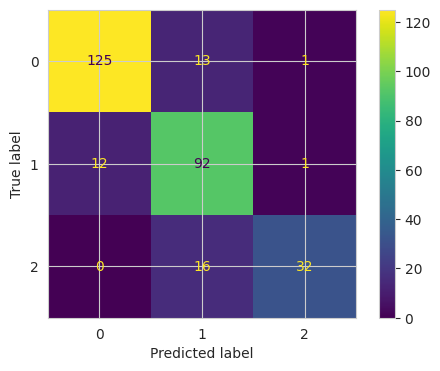

In [24]:
# Generating predictions on the test data using the best model found by GridSearchCV
y_pred = grid_search.predict(X_test)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_test, y_pred)

# Initializing ConfusionMatrixDisplay with the confusion matrix
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 125 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 92 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 32 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama alta (clase 2)
- El modelo cometió menos equivocaciones en la predicción de casas de gama media (clase 1).

In [25]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       139
           1       0.76      0.88      0.81       105
           2       0.94      0.67      0.78        48

    accuracy                           0.85       292
   macro avg       0.87      0.81      0.83       292
weighted avg       0.86      0.85      0.85       292



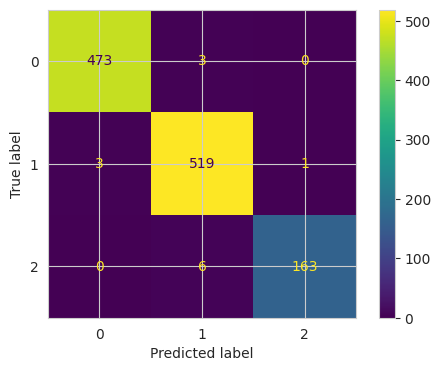

In [26]:
# Generating predictions on the train data using the best model found by GridSearchCV
y_pred = grid_search.predict(X_train)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_train, y_pred)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 475 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 519 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 163 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama alta (clase 2).
- El modelo cometió menos equivocaciones en la predicción de casas de gama económica (clase 0).

In [28]:
# Classification report
print(f'Classification Report: \n{classification_report(y_train, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       476
           1       0.98      0.99      0.99       523
           2       0.99      0.96      0.98       169

    accuracy                           0.99      1168
   macro avg       0.99      0.98      0.99      1168
weighted avg       0.99      0.99      0.99      1168



## 

In [30]:
# Initialize Support Vector Classifier with RBF kernel
clf = SVC(kernel="rbf")
_ = clf.fit(X_train, y_train)

# Define a dictionary of parameters for grid search
param_grid = {
    'C': (0.01, 0.1, 1, 5, 16, 32),  # Values for regularization parameter C
    'gamma': (0.0000000002, 0.00002, 0.01, 0.1, 20, 200)  # Values for gamma
}

# Initialize GridSearchCV with the classifier, parameter grid, number of jobs, and cross-validation folds
grid_search_rbf = GridSearchCV(clf, param_grid=param_grid, n_jobs=2, cv=10)

# Fit GridSearchCV to the training data
grid_search_rbf.fit(X_train, y_train)

# Calculate accuracy scores on both the test and train data
accuracy_test = grid_search_rbf.score(X_test, y_test)
accuracy_train = grid_search_rbf.score(X_train, y_train)

# Print the accuracy scores
print("Test Accuracy:", accuracy_test)
print("Train Accuracy:", accuracy_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:")
for param, value in grid_search_rbf.best_params_.items():
    print(f"{param}: {value}")

Test Accuracy: 0.8595890410958904
Train Accuracy: 0.8955479452054794
Best Parameters:
C: 32
gamma: 2e-05


#### Results and Findings

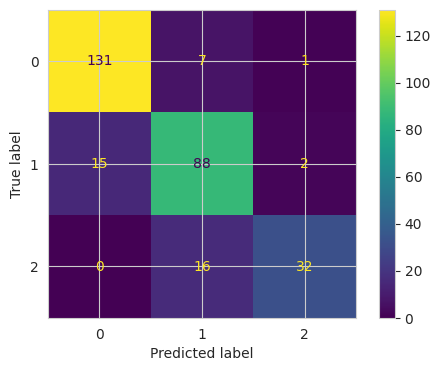

In [31]:
# Generating predictions on the test data using the best model found by GridSearchCV
y_pred = grid_search_rbf.predict(X_test)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_test, y_pred)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 131 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 88 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 32 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama media (clase 1).
- El modelo cometió menos equivocaciones en la predicción de casas de gama económica (clase 0).

In [32]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       139
           1       0.79      0.84      0.81       105
           2       0.91      0.67      0.77        48

    accuracy                           0.86       292
   macro avg       0.87      0.82      0.84       292
weighted avg       0.86      0.86      0.86       292



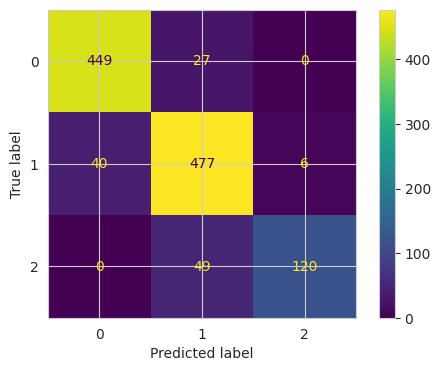

In [ ]:
# Generating predictions on the train data using the best model found by GridSearchCV
y_pred = grid_search_rbf.predict(X_train)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_train, y_pred)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 449 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 477 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 120 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama alta (clase 2).
- El modelo cometió menos equivocaciones en la predicción de casas de gama económica (clase 0).

In [ ]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       139
           1       0.81      0.88      0.84       105
           2       0.97      0.71      0.82        48

    accuracy                           0.88       292
   macro avg       0.90      0.84      0.86       292
weighted avg       0.88      0.88      0.88       292



Basándose en la precisión y las matrices de confusión del conjunto de datos de entrenamiento, podemos concluir que ambos modelos están experimentando sobreajuste. Esta conclusión se basa en la disparidad entre el rendimiento en el conjunto de datos de entrenamiento y el de prueba, donde el primero muestra un desempeño significativamente superior. Para mitigar los efectos negativos del sobreajuste, sería beneficioso ajustar nuevamente los parámetros del modelo. Es importante tener en cuenta que valores muy altos de regularización (C) o muy bajos de gamma para el kernel rbf pueden contribuir al sobreajuste del modelo.

In [ ]:
clf = SVC(kernel="rbf")
_=clf.fit(X_train, y_train)
param_grid = {
    'C': (0.01, 0.1, 1, 5,10,20),
    'gamma':(0.00000002,0.00002,0.01,0.1,20,200 )
}
model_grid_search_rbf = GridSearchCV(clf, param_grid=param_grid, n_jobs=2, cv=10)
model_grid_search_rbf.fit(X_train, y_train)
accuracy = model_grid_search_rbf.score(X_test, y_test)
print("Test set accuracy:", accuracy)
print("Best parameters:", model_grid_search_rbf.best_params_)

Test set accuracy: 0.8595890410958904
Best parameters: {'C': 20, 'gamma': 2e-05}


In [ ]:
y_pred = model_grid_search_rbf.predict(X_train)
accuracy = model_grid_search_rbf.score(X_train, y_train)
print("Train set accuracy:", accuracy)

Train set accuracy: 0.8707191780821918


Al reducir el valor máximo de regularización en los parámetros de búsqueda, se logró un rendimiento idéntico al anterior en el conjunto de pruebas, mientras que la precisión en el conjunto de entrenamiento disminuyó, resultando en una diferencia de 0.01 en la precisión entre ambos modelos.

### Models comparison

In [ ]:
results = {}

# Lista de configuraciones de SVM para probar
svm_configs = [
    {'C': 1, 'kernel': 'linear'},
    {'C': 1, 'kernel': 'rbf'},
]

# Entrenar y evaluar cada configuración de SVM
for config in svm_configs:
    clf = SVC(C=config['C'], kernel=config['kernel'])
    
    # Medir tiempo de entrenamiento
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    
    # Hacer predicciones
    y_pred = clf.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    results[f"SVM_{config['C']}_{config['kernel']}"] = {
        'Training Time': end_time - start_time,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': report
    }

for model, metrics in results.items():
    print(f"Model: {model}")
    for key, value in metrics.items():
        print(f"{key}:")
        if isinstance(value, np.ndarray):
            print(value)
        else:
            print(value)
    print("\n")

Model: SVM_1_linear
Training Time:
0.4891173839569092
Accuracy:
0.8458904109589042
Confusion Matrix:
[[125  13   1]
 [ 14  87   4]
 [  0  13  35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       139
           1       0.77      0.83      0.80       105
           2       0.88      0.73      0.80        48

    accuracy                           0.85       292
   macro avg       0.85      0.82      0.83       292
weighted avg       0.85      0.85      0.85       292



Model: SVM_1_rbf
Training Time:
0.34005117416381836
Accuracy:
0.8767123287671232
Confusion Matrix:
[[130   9   0]
 [ 12  92   1]
 [  1  13  34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       139
           1       0.81      0.88      0.84       105
           2       0.97      0.71      0.82        48

    accuracy                           0.88       292
   macr

Analizando los resultados obtenidos en las métricas previas de los modelos, se puede observar que en tiempo de entrenamiento el modelo kernel RBF fue más rápido con 0.091 segundos que el lineal con 0.120 segundos. 

En cuanto a la precisión, el modelo kernel RBF también superó al lineal en términos de precisión global. RBF obtuvo un 87.67% de precisión, mientras que el modelo lineal un 84.59%. Lo anterior demuestra que el modelo kernel RBF, en general, es más efectivo para clasificar correctamente las instancias del conjunto de prueba.

Analizando la matriz de confusión, se observa con el **modelo lineal** un equilibrio en la clasificación obteniendo:
- 90% de precisión en la clasificación de casas económicas (clase 0), clasificando 123 casas correctamente.
- 77% de precisión en la clasificación de casas de gama media (clase 1), clasificando 87 casas correctamente.
- 88% de precisión en la clasificación de casas de gama alta (clase 2), clasificando 35 casas correctamente.

El **modelo RBF** muestra mejoras significativas en la clasficación de la clase 0 y 1, comparado al modelo lineal. Se obtuvo lo siguiente:
- 91% de precisión en la clasificación de casas económicas (clase 0), clasificando 130 casas correctamente.
- 81% de precisión en la clasificación de casas de gama media (clase 1), clasificando 92 casas correctamente.
- 97% de precisión en la clasificación de casas de gama alta (clase 2), clasificando 34 casas correctamente.

Otras de las métricas son el Recall y el F1-Score:
- El modelo RBF ha mejorado la precisión y el recall en las clases 0 y 1 significativamente.
- La clase 2, aunque tiene una alta precisión en ambos modelos, muestra una caída en recall en el modelo RBF, lo que indica que aunque las predicciones de la clase 2 que hace son correctas, está perdiendo muchas otras instancias reales de esta clase.

En general, el modelo SVM con kernel RBF parece ser superior al modelo lineal en este conjunto de datos, ofreciendo una mejor precisión general, mayor velocidad de entrenamiento y un mejor balance entre precisión y recall para la mayoría de las clases.

### Comparación entre algoritmos

A continuación se muestran las métricas importantes de cada uno, obtenido del notebook de cada hoja realizada anteriormente con el algoritmo respectivo.

|                       | SVM con kernel RBF  | Decision trees | Random Forest | Naive Bayes |
|-----------------------|---------------------|----------------|---------------|-------------|
|   Precisión           |        0.87         |    0.79        |     0.82      |      0.67   |
|   Tiempo de ejecución |        0.091        |    0.34        |     0.13      |      0.53   |


Al comparar la eficiencia del modelo SVM con kernel RBF y otros algoritmos en hojas de trabajo pasadas utilizando la misma variable de respuesta, puede evidenciarse que el modelo SVM destaca en su precisión comparado con el resto. Es por ello que puede considerarse como el mejor para predecir y el más rápido en procesar los datos.